In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [57]:
# Reading the banknote data from the CSV file.
Bank = pd.read_csv("BankNote_Authentication.csv")

In [58]:
# Displaying the first five rows of the Dataset.
Bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [59]:
#Printing information about the Dataset.

print(Bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [60]:
# Printing the last five rows of the Dataset.

Bank.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [61]:
#Displaying summary statistics of the Dataset

Bank.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [62]:
#Displaying the shape of the Dataset (number of rows and columns).

Bank.shape

(1372, 5)

In [63]:
#Counting the occurrences of each unique value in the 'class' column.

Bank['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [64]:
#Checking for missing values in each column and sum the total for each column.

Bank.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [65]:
def plot_variance_vs_skewness(Bank):
    """
    Scatter plot of 'variance' against 'skewness', with points representing variance in red and skewness in green.

    """
    # Scatter plot of 'variance' against 'skewness', with points representing variance in red and skewness in green
    plt.scatter(Bank.variance, Bank.skewness, color="red", label='Variance', alpha=0.5)
    plt.scatter(Bank.variance, Bank.skewness, color="green", label='Skewness', alpha=0.5)

    # Title of the plot
    plt.title('Scatter Plot of Variance v Skewness')

    # Label for the x-axis
    plt.xlabel('Variance')

    # Label for the y-axis
    plt.ylabel('Skewness')

    # Legend to distinguish between variance and skewness points
    plt.legend()

    # Display the plot
    plt.show()

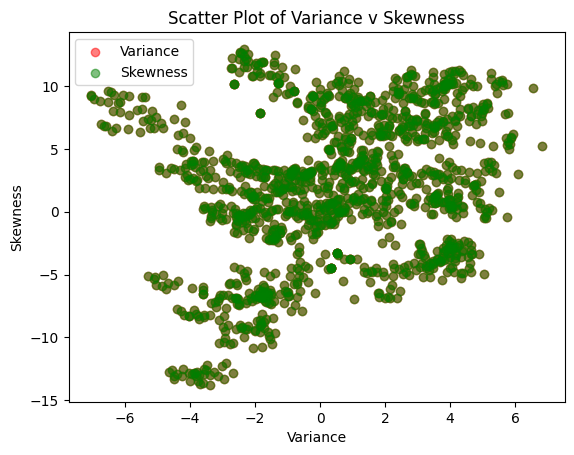

In [66]:
# Plotting the variance against skewness in the Bank dataset
plot_variance_vs_skewness(Bank)

In [67]:
def plot_distribution(Bank, color='red', kde=True):
    """
    Plot the distribution of all variables in a DataFrame.
    
    """
    #Determining the number of rows and columns for subplots.
    
    #Number of columns in the DataFrame
    num_cols = Bank.shape[1]
    
    #Ensuring an even number of rows
    num_rows = (num_cols + 1) // 2 

    # Creating  subplots and Adjusting figsize.
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4)) 
    
    
    #Flattening axes if necessary.
    if num_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    #Plotting distribution for each variable
    for i, column in enumerate(Bank.columns):
        
        #Plotting histogram with seaborn.
        sns.histplot(Bank[column], ax=axes[i], color=color, kde=kde)
        
        #Setting title for each subplot
        axes[i].set_title(f'Distribution of {column}')

    #Removing any extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    #Adjustting subplot layout
    plt.tight_layout()
    
    #Showing the plot
    plt.show()

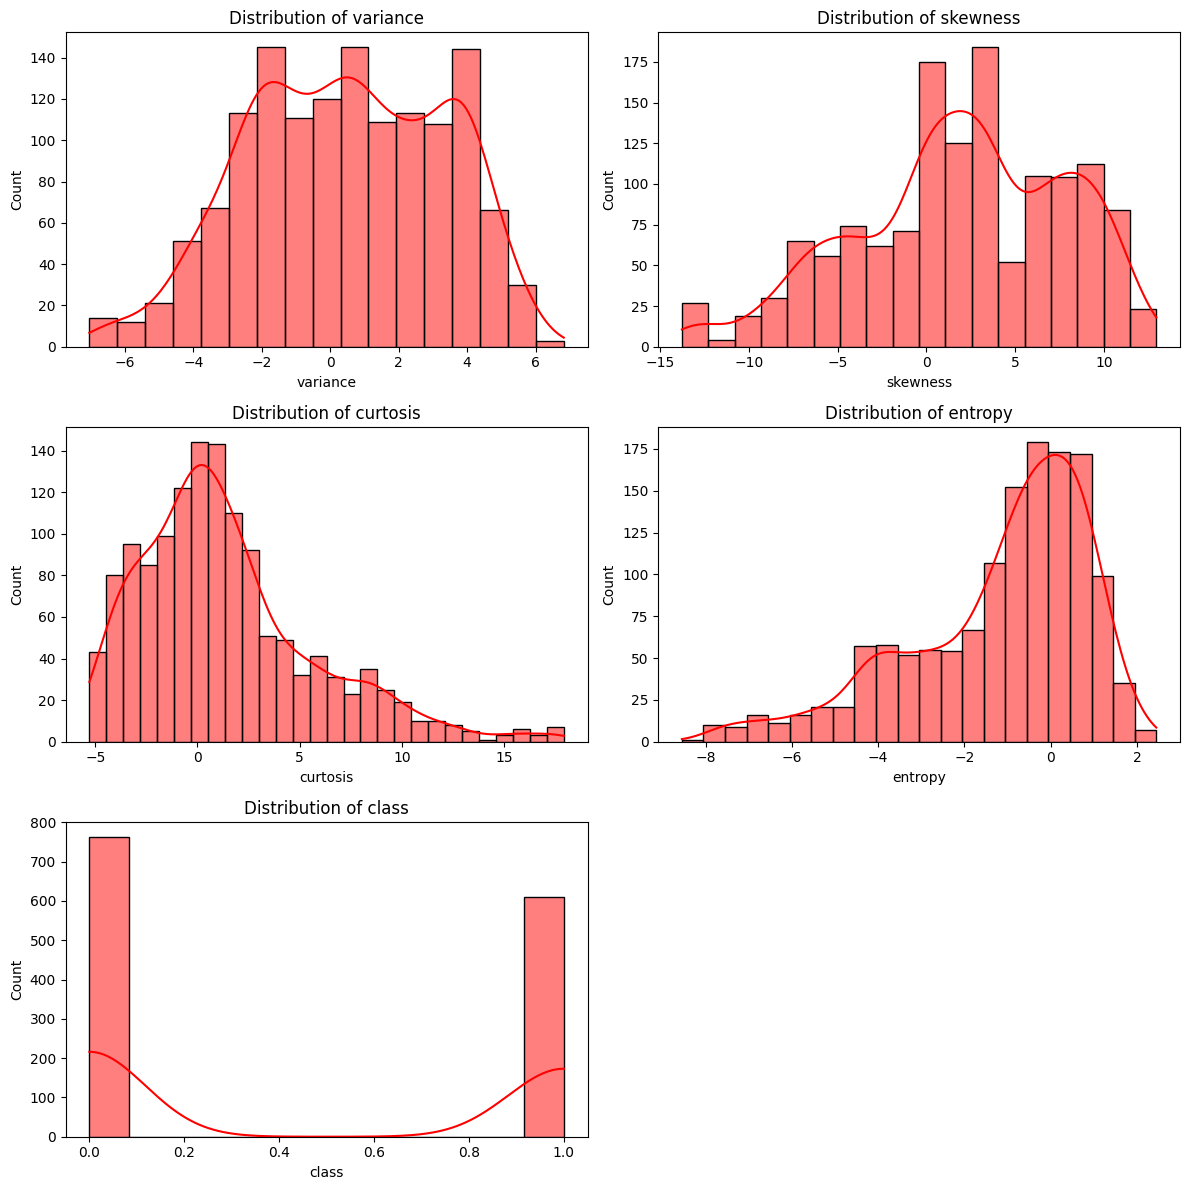

In [68]:
#Plotting the distribution of all variables.

plot_distribution(Bank)

In [69]:
def plot_correlation_heatmap(df, annot=True, cmap='RdYlBu'):
    """
    Plot a heatmap of the correlation matrix for a DataFrame.

    """
    sns.heatmap(Bank.corr(), annot=annot, cmap=cmap)

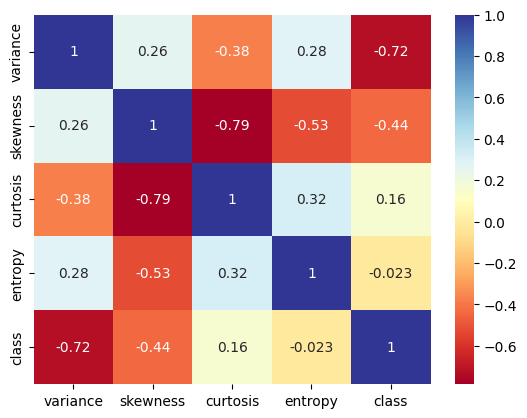

In [70]:
#Plotting the correlation Heatmap.
plot_correlation_heatmap(Bank)

In [71]:
def Bank_pairplot(Bank, hue_column):
    """
    Create a pairplot of variables in a DataFrame with data points colored by a specified column.

    """
    sns.pairplot(Bank, hue=hue_column)

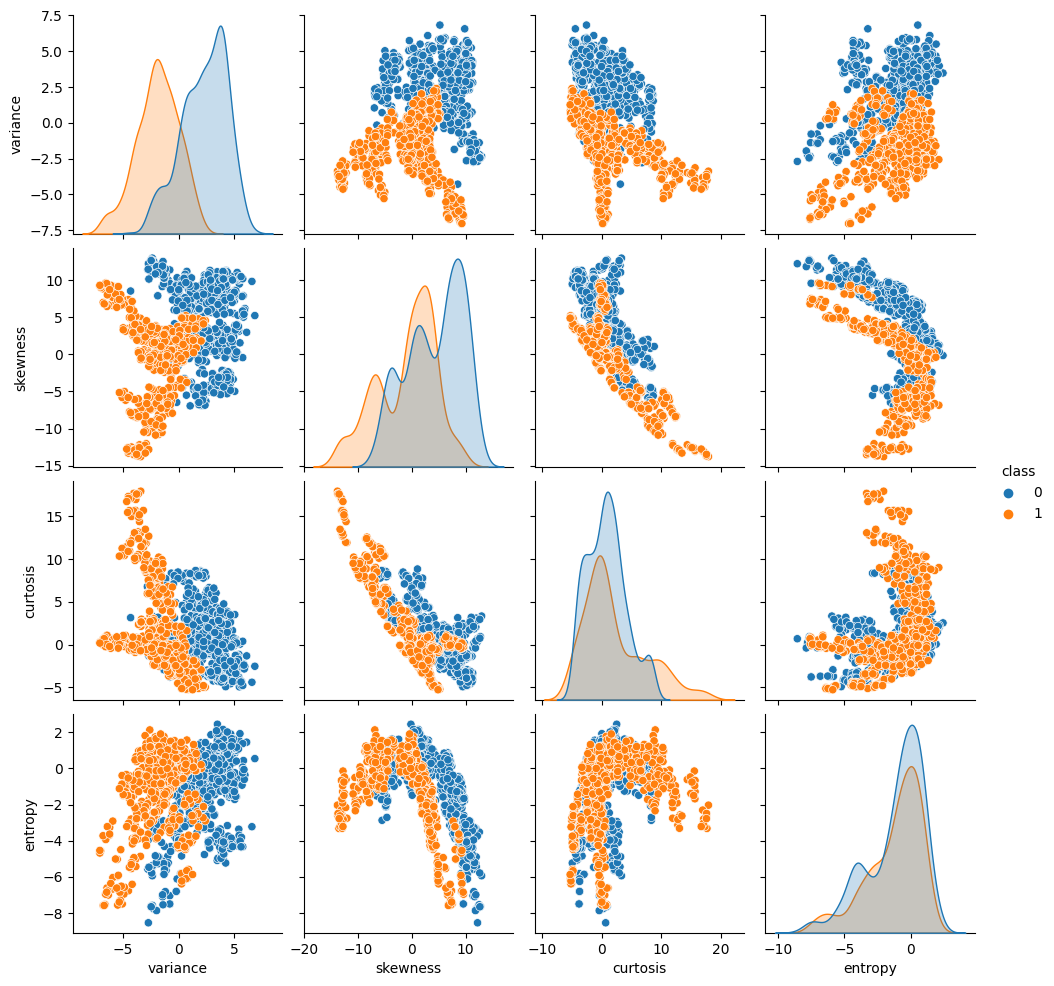

In [72]:
# Generating a pair plot for the Bank dataset with the target column 'class'
Bank_pairplot(Bank, 'class')

In [96]:
def plot_clusters_with_centers(Bank, n_clusters=2, max_iter=3):
    """
    Plots clustered data with cluster centers.

    """

    # Creating subplots with a 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    
    # Defining the number of iterations
    n_iter = 1
    
    # Determine the appropriate number of clusters using silhouette score or elbow method
    silhouette_scores = []
    
    # corrected variable name
    for n in range(2, n_clusters+1):
        kmeans = KMeans(n_clusters=n, n_init=20)
        
        # corrected data variable
        kmeans.fit(Bank)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(Bank, labels))
    
    # Select the number of clusters with the highest silhouette score
    # Add 2 because range starts from 2
    best_n = np.argmax(silhouette_scores) + 2  
    
    # Iterating through the number of iterations
    for i in range(n_iter):
        # Initialize KMeans with specified parameters
        km = KMeans(n_clusters=n_clusters, max_iter=max_iter)
        km.fit(Bank)
        centroids = km.cluster_centers_

        # Scatter plot for each pair of columns
        for j, col_pair in enumerate([('variance', 'skewness'), ('variance', 'curtosis'), ('variance', 'entropy'), ('skewness', 'curtosis')]):
            
            # Get the current axis
            ax = axs[j // 2, j % 2]
            
            # Extracting column names for x and y axes
            col_x, col_y = col_pair
            
            # Scatter plot for data points in each cluster
            for cluster_label in range(n_clusters):
                cluster_data = Bank[km.labels_ == cluster_label]
                ax.scatter(cluster_data[col_x], cluster_data[col_y], label=f'Cluster {cluster_label + 1}')
            
            # Scatter plot for cluster centers (red asterisks)
            ax.scatter(centroids[:, Bank.columns.get_loc(col_x)], centroids[:, Bank.columns.get_loc(col_y)], c='r', marker='*', s=100, label='Cluster Centers')
            
            # Setting label for x-axis
            ax.set_xlabel(col_x)
            
            # Setting label for y-axis
            ax.set_ylabel(col_y)
            
            # Displaying legend for the plot
            ax.legend()

    # Setting the title
    fig.suptitle('Clusters with Cluster Centers', fontsize=16)
    
    # Adjust the layout of subplots to prevent overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

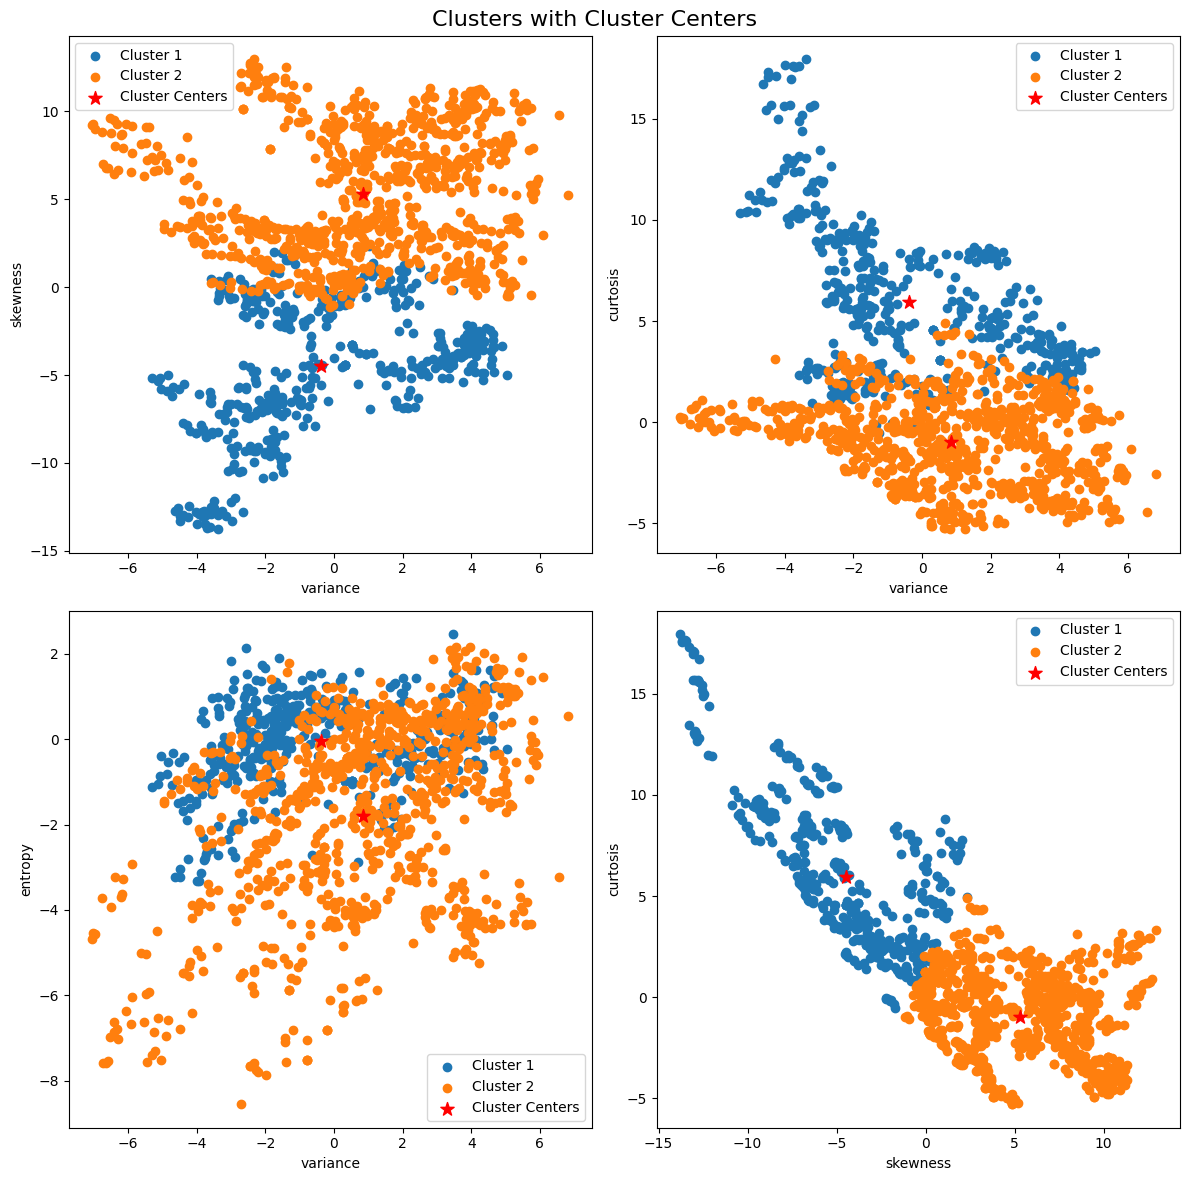

In [97]:
# Plotting clusters with their centers for the Bank dataset
plot_clusters_with_centers(Bank)

In [98]:
# Normalizing the  Bank data
X = Bank
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [99]:
def plot_elbow(Bank, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        # Initialize KMeans with the specified number of clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        
        # Fit KMeans to the data
        kmeans.fit(Bank)
        
        # Calculate distortion (inertia) and append to the list
        distortions.append(kmeans.inertia_)
        
    # Plot the elbow curve    
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    
    # Setting the label for the x-axis
    plt.xlabel('Number of clusters')
    
    # Setting the label for the y-axis
    plt.ylabel('Distortion')
    
    # Setting the title of the plot
    plt.title('Elbow Method')
    
    # Displaying the plot
    plt.show()

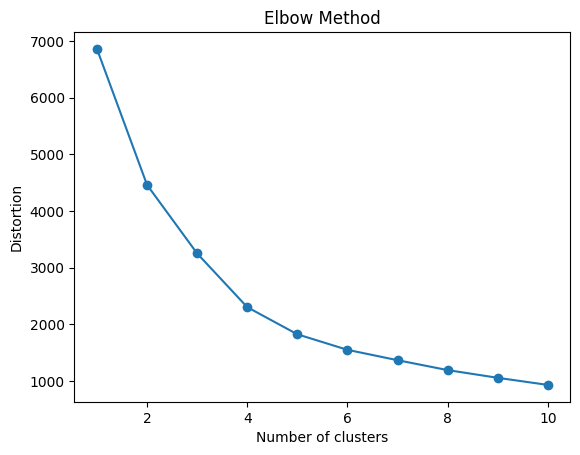

In [100]:
# Plotting the elbow plot
# Adjust the max_clusters parameter as needed
plot_elbow(X_normalized, 10)

In [101]:
def plot_silhouette(Bank, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        
        # Initialize KMeans with the specified number of clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        
        # Fit KMeans to the data
        kmeans.fit(Bank)
        
        # Get the cluster labels
        labels = kmeans.labels_ 
        
        # Calculate silhouette score and append to the list
        silhouette_scores.append(silhouette_score(Bank, labels))
    
    # Plot the silhouette curve   
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    
    # Set the label for the x-axis
    plt.xlabel('Number of clusters')
    
    # Set the label for the y-axis
    plt.ylabel('Silhouette Score')
    
    # Set the title of the plot
    plt.title('Silhouette Method')
    
    # Display the plot
    plt.show()

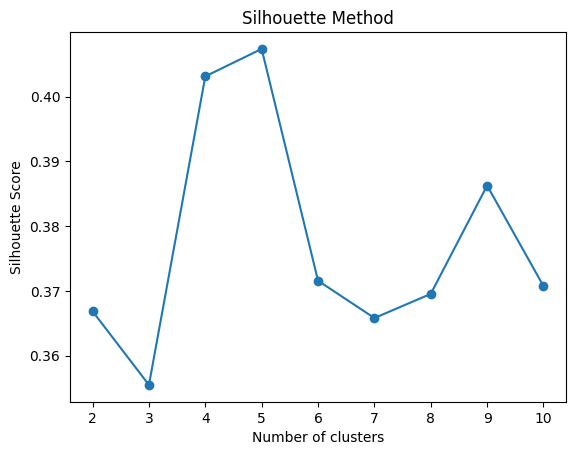

In [102]:
# Plotting the silhouette plot
# Adjust the max_clusters parameter as needed
plot_silhouette(X_normalized, 10)

In [103]:
def plot_polynomial_fitting_variance_skewness(Bank, degree=2, confidence_level=0.95, num_predictions=6):
    """
    Fitting a polynomial of specified degree(2) to 'variance' and 'skewness' columns of the Bank dataset 
    and plottings the data points, the fitted curve, confidence intervals, and predicted points with uncertainties.
    
    """

    # Extracting features:
    X = Bank['variance'].values
    y = Bank['skewness'].values

    # Fitting polynomial:
    coefficients = np.polyfit(X, y, degree)
    polynomial = np.poly1d(coefficients)

    # Plotting the data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Actual', alpha=0.5)

    # Labeling axes and title
    plt.xlabel('Variance')
    plt.ylabel('Skewness')
    plt.title(f'Polynomial Fitting of Variance vs Skewness (Degree {degree})')

    # Generating points for the fitted curve:
    x_fit = np.linspace(X.min(), X.max(), 100)
    y_fit = polynomial(x_fit)

    # Plotting the fitted curve
    plt.plot(x_fit, y_fit, color='black', label=f'Polynomial Fit (Degree {degree})')

    # Calculating confidence intervals for the fitted curve:
    p = 1 - (1 - confidence_level) / 2 
    n = len(X)
    t = np.abs(np.percentile(np.random.standard_t(df=n-2, size=10000), p * 100))
    se = np.sqrt(np.sum((y - polynomial(X))**2) / (n - 2))
    confidence_interval = t * se * np.sqrt(1/n + (x_fit - np.mean(X))**2 / np.sum((X - np.mean(X))**2))

    # Plotting confidence intervals
    plt.fill_between(x_fit, y_fit - confidence_interval, y_fit + confidence_interval, color='gray', alpha=0.2, label=f'{confidence_level} Confidence Interval')

    # Generating predicted points with uncertainties
    # for reproducibility
    np.random.seed(42)
    for _ in range(num_predictions):
        
        # Generating random X values within the range of the data
        x_pred = np.random.uniform(X.min(), X.max())
        
        # Calculating the predicted value
        y_pred = polynomial(x_pred)
        
        # Calculating the uncertainty based on the confidence interval
        uncertainty = t * se * np.sqrt(1 + 1/n + (x_pred - np.mean(X))**2 / np.sum((X - np.mean(X))**2))
        
        # Plotting the predicted point with uncertainty
        plt.errorbar(x_pred, y_pred, yerr=uncertainty, fmt='o', color='blue', label='Predicted Points')

    # Displaying the legend
    plt.legend()

    # Displaying the plot
    plt.show()

In [104]:
# Specifying the degree of the polynomial
degree = 2 

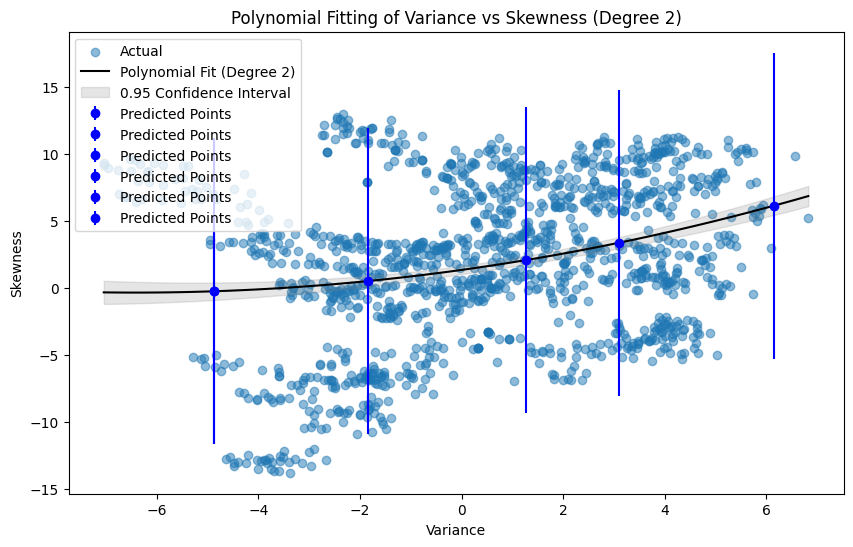

In [105]:
# Calling the function to plot polynomial fitting of variance vs skewness
plot_polynomial_fitting_variance_skewness(Bank, degree)